In [210]:
#This following Method will read a bunch of circuits and calculate the circuit depth of each of them lols.
from qiskit import *
import random
import os
from qiskit.circuit.random import random_circuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.h(1)
qc.x(0)
qc.cx(1,0)
qc.draw()
qc = transpile(qc,optimization_level =3)
qc.draw()
qc.depth()


/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


1

In [203]:
random_circuits = []
for i in range(50):
    num_qubits = random.randint(3,15)
    depth = random.randint(2,5)
    qc = random_circuit(num_qubits, depth, measure=True)
    random_circuits.append(qc)
random_circuits

In [176]:
#This method takes all the circuits built by MQT and makes them into a list
def file_reader(file_path):
    circuits = []
    directory = file_path
    for circuit in os.listdir(directory):
        circuit_path = f"{file_path}/{circuit}"
        print(circuit_path)
        qc = QuantumCircuit.from_qasm_file(circuit_path)
        circuits.append(qc)
    return circuits

In [222]:
MQT_circuits = file_reader("/Users/noelnegron/Desktop/MQTBench_2023-07-13-16-50-22")


/Users/noelnegron/Desktop/MQTBench_2023-07-13-16-50-22/random_indep_qiskit_100.qasm
/Users/noelnegron/Desktop/MQTBench_2023-07-13-16-50-22/random_indep_qiskit_116.qasm
/Users/noelnegron/Desktop/MQTBench_2023-07-13-16-50-22/random_indep_qiskit_99.qasm
/Users/noelnegron/Desktop/MQTBench_2023-07-13-16-50-22/random_indep_qiskit_6.qasm
/Users/noelnegron/Desktop/MQTBench_2023-07-13-16-50-22/random_indep_qiskit_95.qasm
/Users/noelnegron/Desktop/MQTBench_2023-07-13-16-50-22/random_indep_qiskit_120.qasm
/Users/noelnegron/Desktop/MQTBench_2023-07-13-16-50-22/random_indep_qiskit_121.qasm
/Users/noelnegron/Desktop/MQTBench_2023-07-13-16-50-22/random_indep_qiskit_94.qasm
/Users/noelnegron/Desktop/MQTBench_2023-07-13-16-50-22/random_indep_qiskit_7.qasm
/Users/noelnegron/Desktop/MQTBench_2023-07-13-16-50-22/random_indep_qiskit_98.qasm
/Users/noelnegron/Desktop/MQTBench_2023-07-13-16-50-22/random_indep_qiskit_117.qasm
/Users/noelnegron/Desktop/MQTBench_2023-07-13-16-50-22/random_indep_qiskit_101.qasm


In [225]:
def benchmark_circuit_depth(circuits):
    Map = {}
    counter = 1
    for i in range(9):
        depths = []
        depths.append(transpile(circuits[i], optimization_level=1).depth())
        depths.append(transpile(circuits[i], optimization_level=2).depth())
        depths.append(transpile(circuits[i], optimization_level=3).depth())
        Map[i]= depths
        print(counter)
        counter += 1
    return Map

In [226]:
#This obtains Circuit Depth:
Map = benchmark_circuit_depth(MQT_circuits)

1
2
3
4
5
6
7
8
9


{0: [1336, 1336, 1585], 1: [1533, 1533, 1938], 2: [1321, 1320, 1616], 3: [34, 34, 43], 4: [1215, 1215, 1471], 5: [1652, 1649, 1945], 6: [1600, 1599, 1987], 7: [1265, 1265, 1546], 8: [41, 40, 54]}


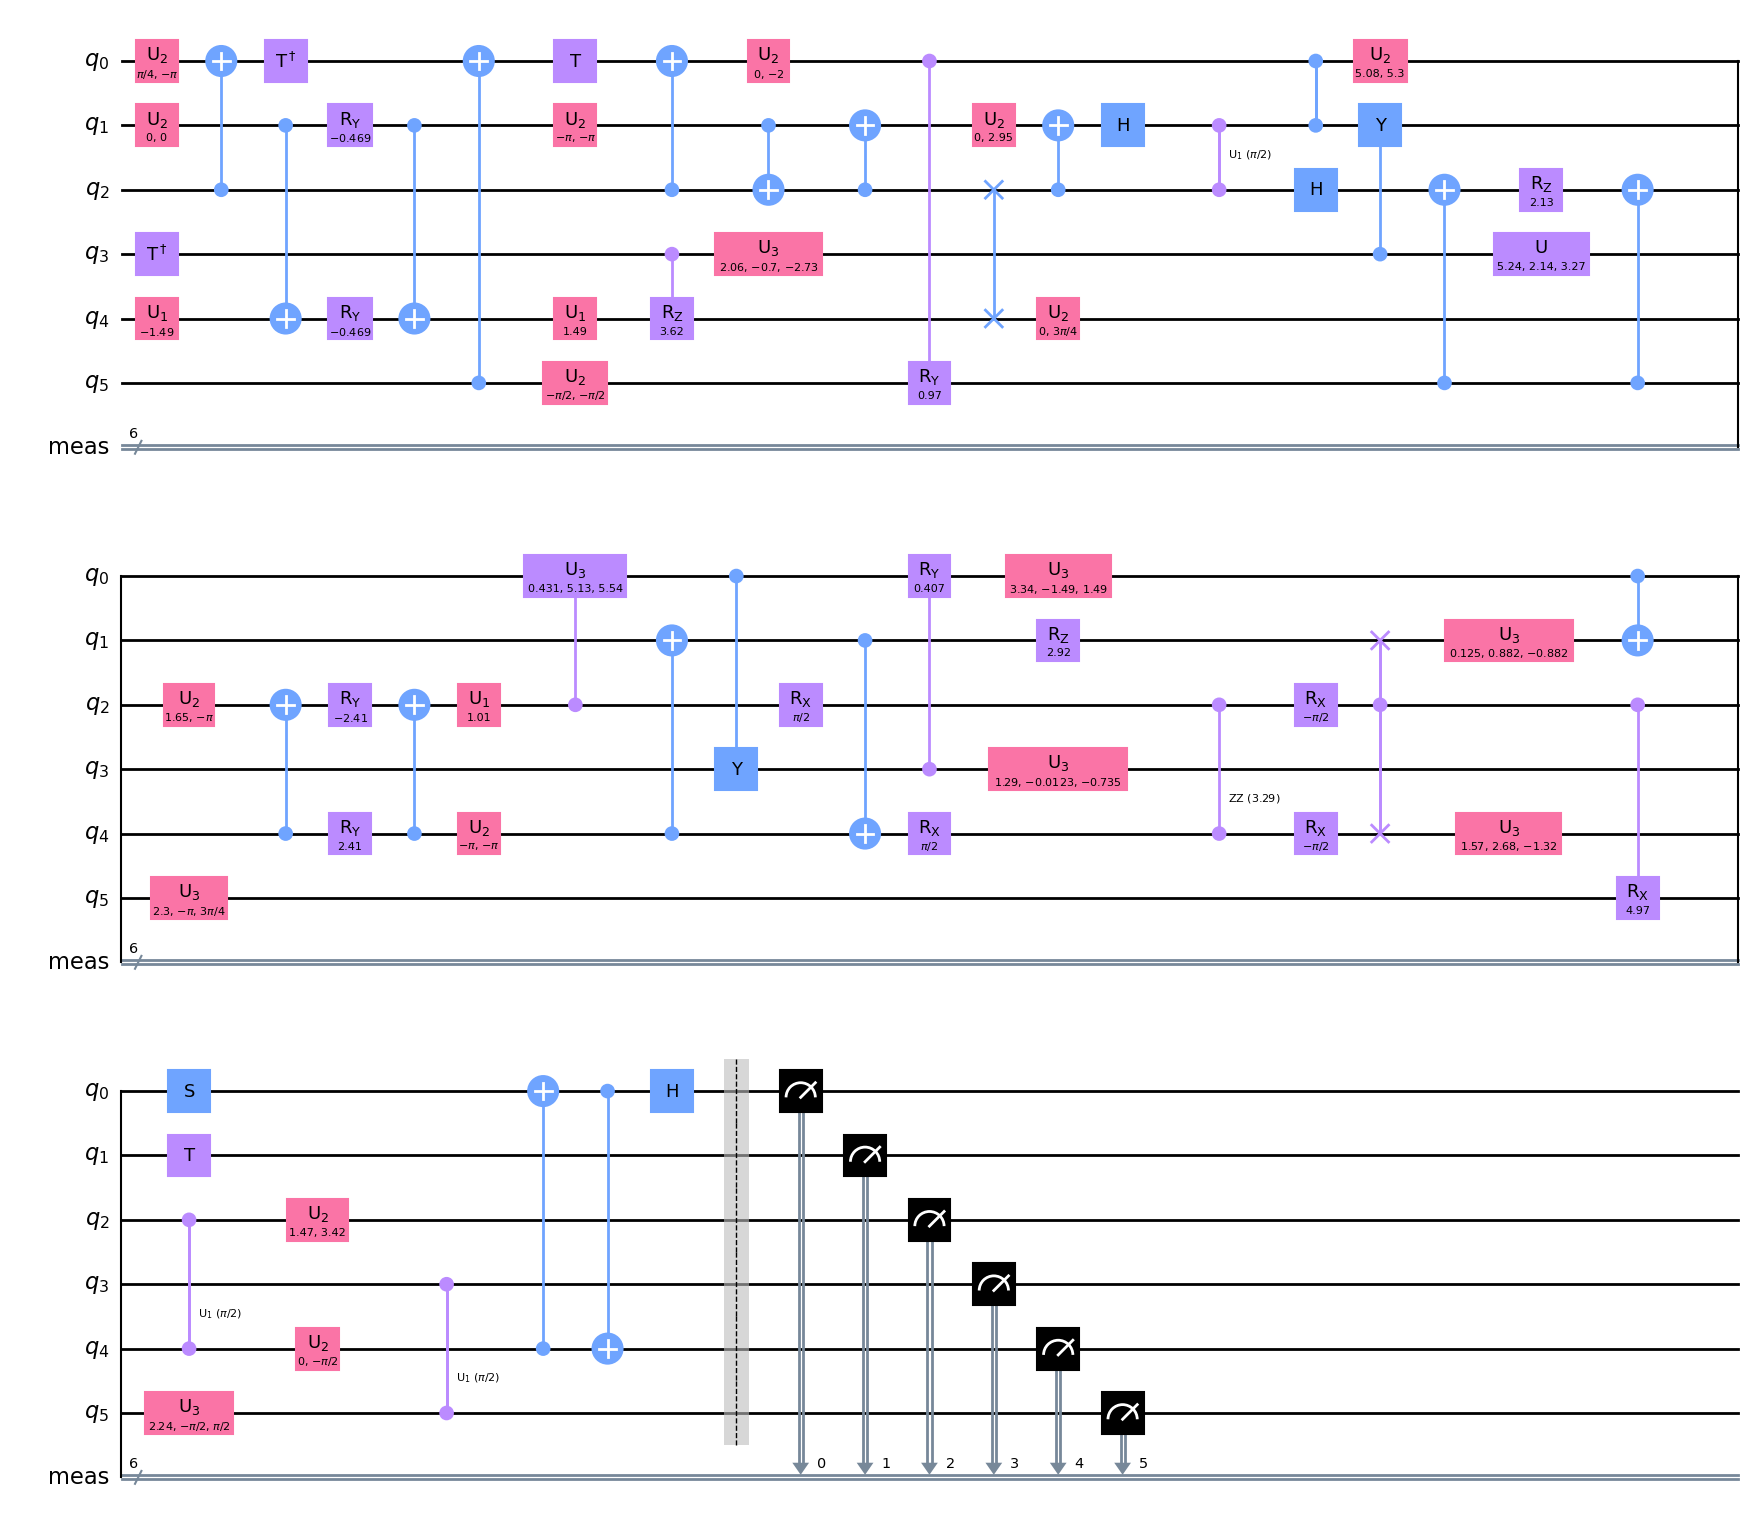

In [231]:
print(Map)
MQT_circuits[3].draw('mpl')